In [28]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
from sklearn.metrics import jaccard_score
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
def prox_L1(x, tau):
    return x - np.maximum(np.minimum(x, tau), -tau)

def optD(self, x):
    if canal == 3:
        y = np.zeros((rows, cols, 2, canal))
        y[:, :, 0, :] = (np.concatenate((x[:, 1:, :] - x[:, 0:-1, :], np.zeros((rows, 1, canal))),axis=1,)/ 2.0 )
        y[:, :, 1, :] = (np.concatenate( (x[1:, :, :] - x[0:-1, :, :], np.zeros((1, cols, canal))),axis=0,)/ 2.0)
        return y
    elif canal == 1:
        y = np.zeros((rows, cols, 2))
        # # print(temp.shape)
        y[:, :, 0] = (np.concatenate((x[:, 1:] - x[:, 0:-1], np.zeros((rows, 1))), axis=1)/ 2.0)
        y[:, :, 1] = (np.concatenate((x[1:, :] - x[0:-1, :], np.zeros((1, cols))), axis=0 )/ 2.0)
        return y

def optDadjoint( x):
    if canal == 3:
        y1 = (np.concatenate((x[:, 0, 0, :].reshape(rows, 1, 3),x[:, 1:-1, 0, :] - x[:, 0:-2, 0, :],-x[:, -2, 0, :].reshape(rows, 1, 3),),axis=1,)/ 2) 
        y2 = (np.concatenate((x[0, :, 1, :].reshape(1, cols, 3),x[1:-1, :, 1, :] - x[:-2, :, 1, :],-x[-2, :, 1, :].reshape(1, cols, 3),),axis=0,)/ 2)
        y = -y1 - y2
        return y
    elif self.canal == 1:
        y1 = (np.concatenate((x[:, 0, 0].reshape(rows, 1), x[:, 1:-1, 0] - x[:, 0:-2, 0],-x[:, -2, 0].reshape(rows, 1),),axis=1,)/ 2.0)
        y2 = ( np.concatenate(( x[0, :, 1].reshape(1, cols),x[1:-1, :, 1] - x[:-2, :, 1],-x[-2, :, 1].reshape(1, cols),),axis=0,)/ 2.0)
        y = -y1 - y2
        return y
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

In [3]:
listname = ['80090','157032','196027','106005','163004']

In [4]:
def calculate_psnr(img1, img2, max_value=1):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [5]:
listx=[]
liste=[]

100%|█████████████████████████████████████████████████████████████| 175/175 [00:21<00:00,  8.15it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


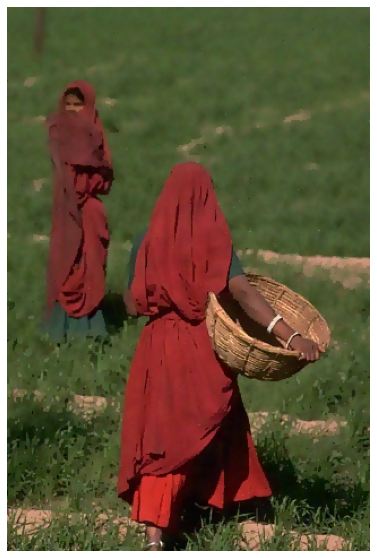

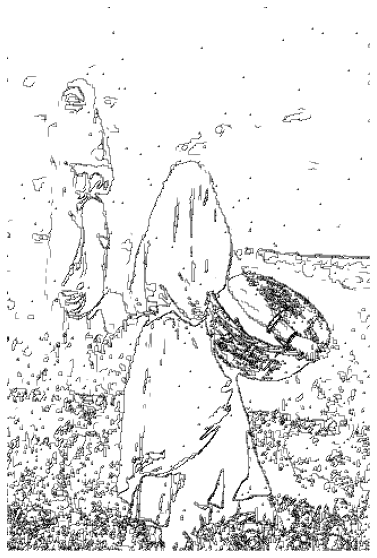

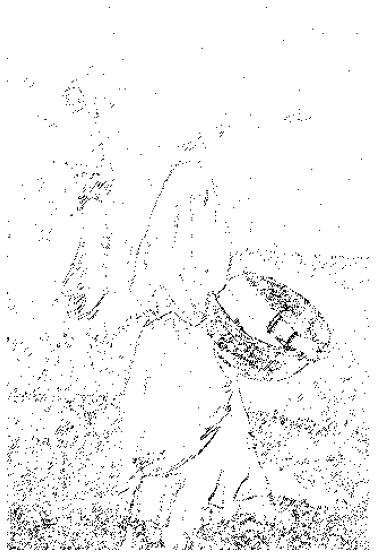

0.07954977471461173
31.173446484958035


100%|█████████████████████████████████████████████████████████████| 175/175 [00:21<00:00,  8.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


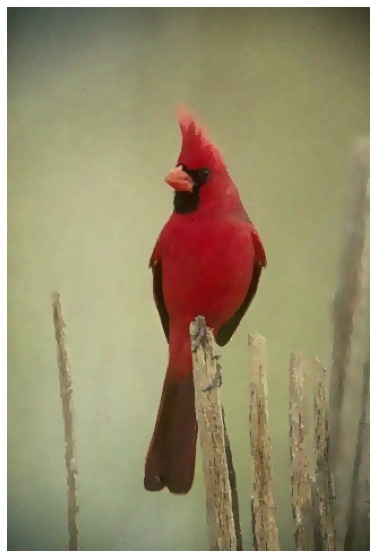

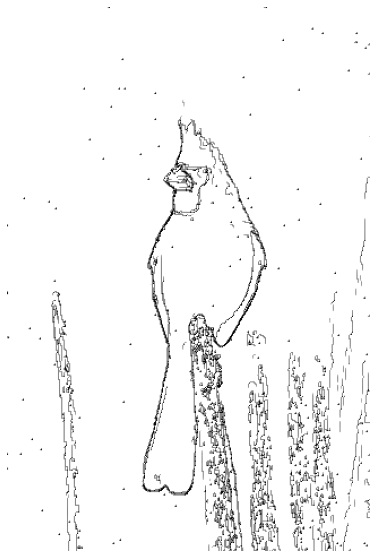

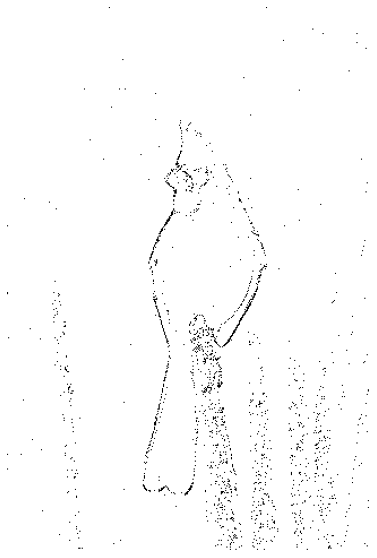

/home/hoangtrieuvy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.05067581226507308
34.95821171412845


100%|█████████████████████████████████████████████████████████████| 175/175 [00:23<00:00,  7.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


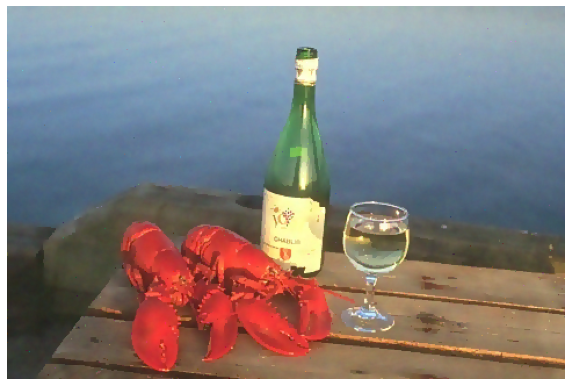

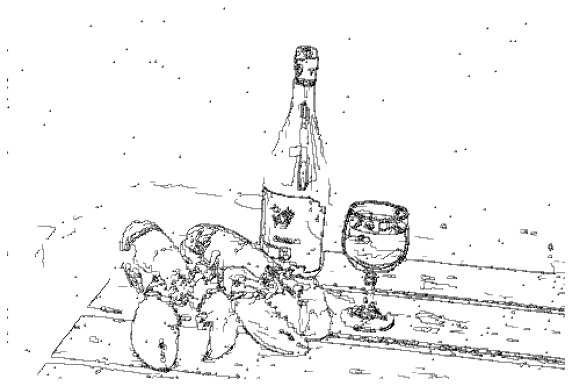

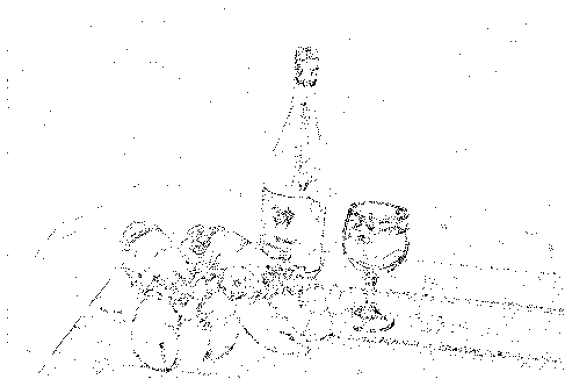

0.08182885246728218
33.666377512961134


100%|█████████████████████████████████████████████████████████████| 175/175 [00:31<00:00,  5.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


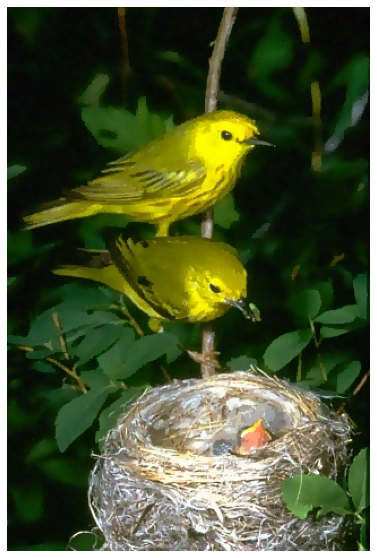

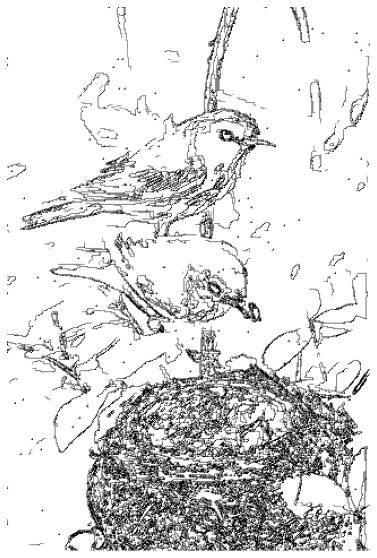

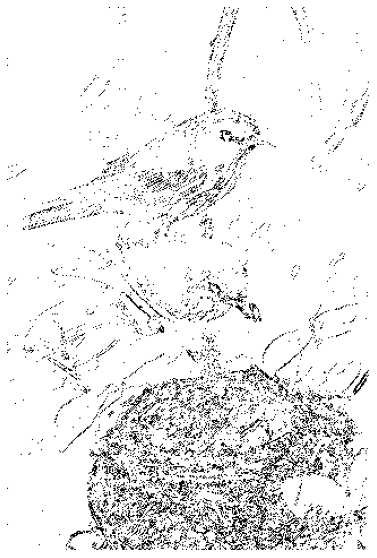

0.061303683797361425
31.11652073054744


100%|█████████████████████████████████████████████████████████████| 175/175 [00:29<00:00,  5.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


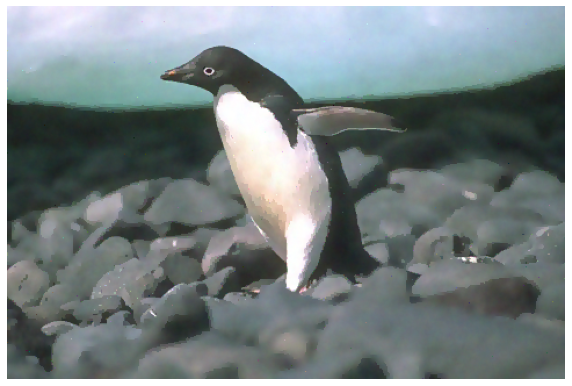

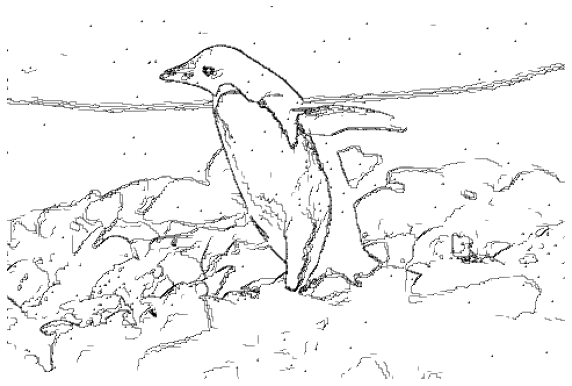

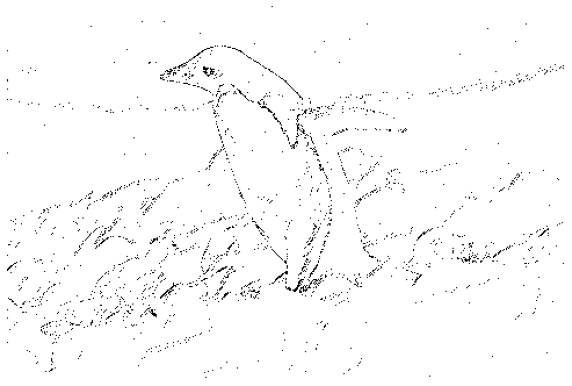

0.07005995660669237
34.14511069048912


In [28]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            cont = np.where(cont > 0, 1, 0)


            rows,cols,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)
            slpam_l1_solver = DMS(norm_type="l1",
                                    edges="similar",
                                    beta=8,
                                    lamb=1e-2,
                                    stop_criterion=1e-4,
                                    MaximumIteration=175,
                                    method="SLPAM",
                                    noised_image_input=z,
                                    optD="OptD",
                                    dk_SLPAM_factor=1e-5,
                                    A=np.ones((rows,cols)))
            out_slpam_l1 = slpam_l1_solver.process()
            listx+= [out_slpam_l1[1]]
            liste+= [out_slpam_l1[0]]
            plt.figure(figsize=(10,10))
            plt.imshow(out_slpam_l1[1])
            plt.axis('off')
            plt.show()
            
            epred = (out_slpam_l1[0][:,:,0]+out_slpam_l1[0][:,:,1])/2
            ethres = (epred>0.2)*np.ones_like(epred)
            plt.figure(figsize=(10,10))
            plt.imshow(epred,cmap='gray_r')
            plt.axis('off')
            plt.show()
            plt.figure(figsize=(10,10))
            plt.imshow(ethres,cmap='gray_r')
            plt.axis('off')
            plt.show()
            print(jaccard_score(cont,ethres,average='macro'))
            print(calculate_psnr(x,out_slpam_l1[1]))
#         idim+=1 
#         if idim ==1:
#             break

In [40]:
def calculate_psnr(img1, img2, max_value=1):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    return 20 * np.log10(max_value / (np.sqrt(mse)))
def jaccard(im1, im2):
    """
    Computes the Jaccard metric, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    jaccard : float
        Jaccard metric returned is a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0

    Notes
    -----
    The order of inputs for `jaccard` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    intersection = np.logical_and(im1, im2)

    union = np.logical_or(im1, im2)

    return intersection.sum() / float(union.sum())

/tmp/ipykernel_26468/3696704975.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im1 = np.asarray(im1).astype(np.bool)
/tmp/ipykernel_26468/3696704975.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im2 = np.asarray(im2).astype(np.bool)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

80090 31.173446484958035 0.14291146679572717


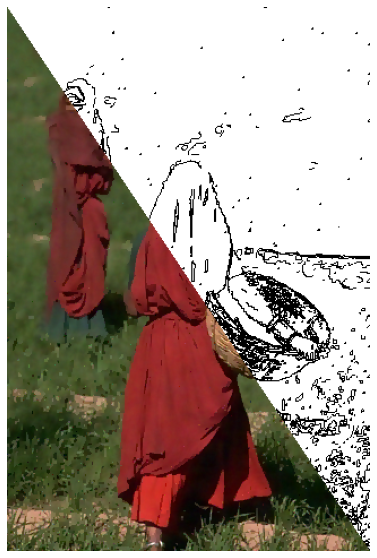

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


196027 34.95821171412845 0.18538430904022302


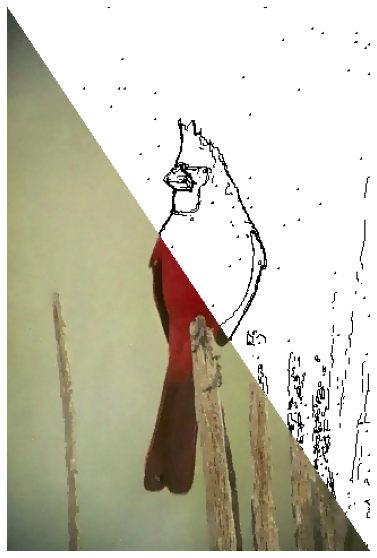

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


157032 33.666377512961134 0.23357664233576642


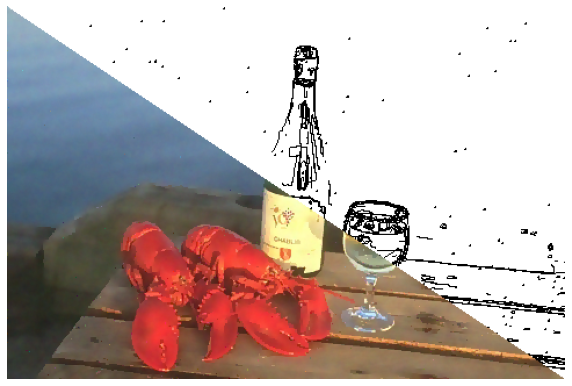

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


163004 31.11652073054744 0.11592019456341605


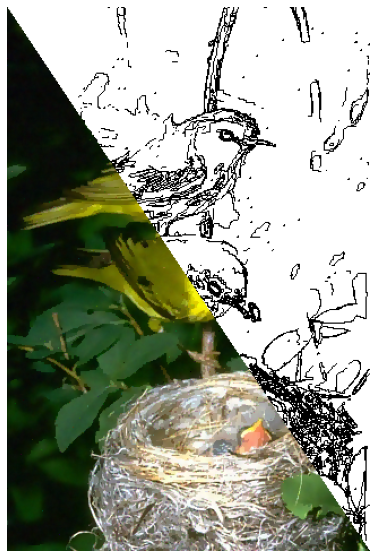

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


106005 34.14511069048912 0.17363112391930835


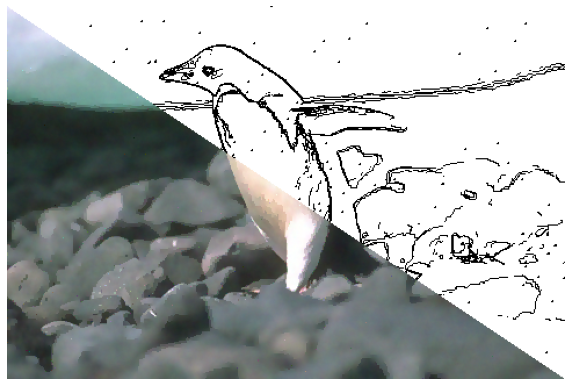

In [41]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            e_exact = np.where(cont > 0, 1, 0)

#             plt.figure(figsize=(10,10))
#             plt.imshow(cont,cmap='gray_r')
#             plt.show()
            epred = (liste[idim][:,:,0]+liste[idim][:,:,1])/2
            ethres = (epred>0.4)*np.ones_like(epred)
#             plt.figure(figsize=(10,10))
#             plt.imshow(ethres,cmap='gray_r')
#             plt.show()
#             print(jaccard_score(cont,ethres,average='macro'))
#             print(calculate_psnr(x,listx[idim]))
            thr=0.4
            e1 = 1-np.ones_like(epred)*(epred>thr)
            x1 = listx[idim]

            print(image_name,calculate_psnr(x,x1),jaccard(e_exact,np.ones_like(epred)*(epred>thr)))


            show=np.copy(x1)
            plt.figure(figsize=(10,10))
            for i in range(rows):
                # Loop through eac h column
                for j in range(cols):
                    # If the column index is greater than the row index, it's an element in the upper diagonal
                    if j > i*(cols/rows):
                        show[i,j,0]=e1[i,j]
                        show[i,j,1]=e1[i,j]
                        show[i,j,2]=e1[i,j]
            plt.imshow(show)
            plt.axis('off')
            plt.savefig('thres_TDScCP_SF_est_joint_'+str(image_name)+'.png', bbox_inches='tight', pad_inches=0)
            plt.show()
            idim+=1 
#         if idim ==1:
#             break

In [ ]:
listname = ['80090','157032','196027','106005','163004']

In [46]:
# listname = ['80090']
listname = ['108073','310007','42044','299091']
listname = ['108073']

100%|█████████████████████████████████████████████████████████████| 300/300 [00:36<00:00,  8.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


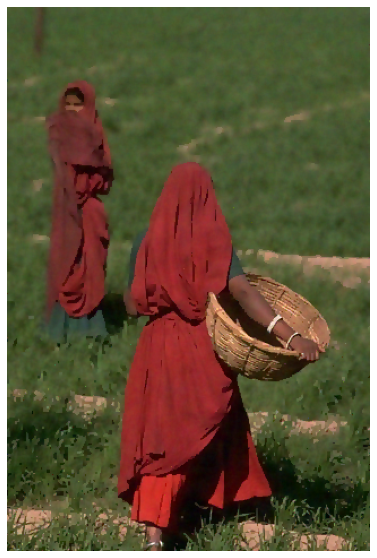

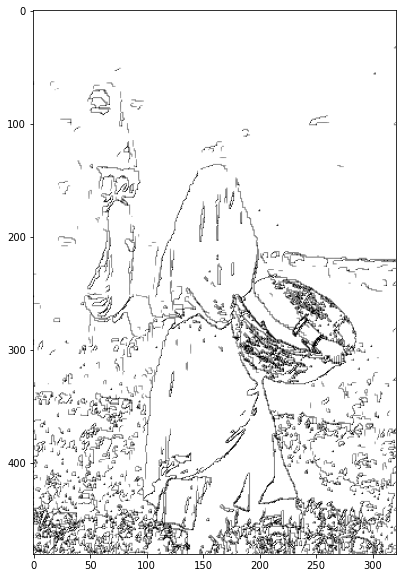

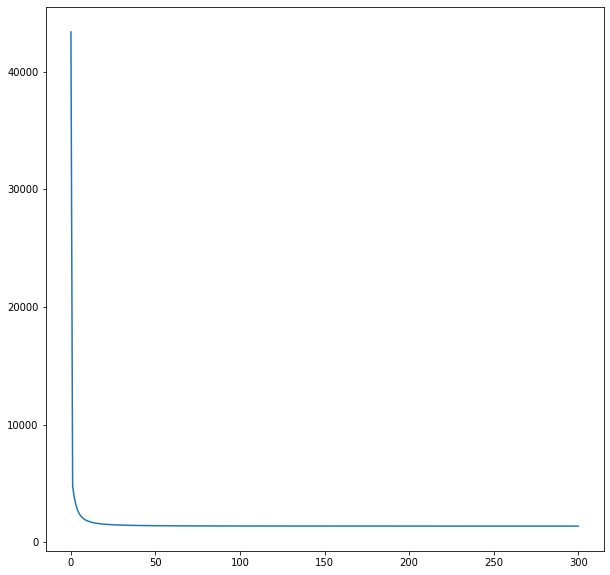

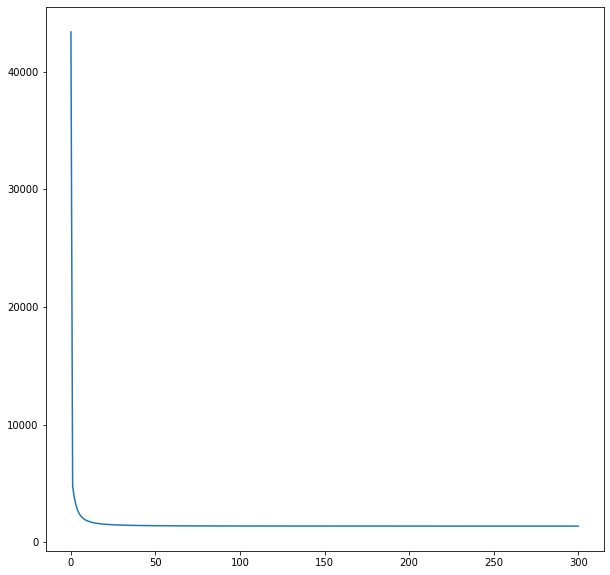

0.13781471484026964
31.26639167497943


100%|█████████████████████████████████████████████████████████████| 300/300 [00:36<00:00,  8.26it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


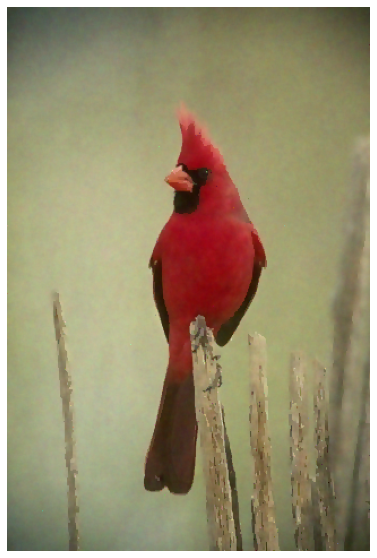

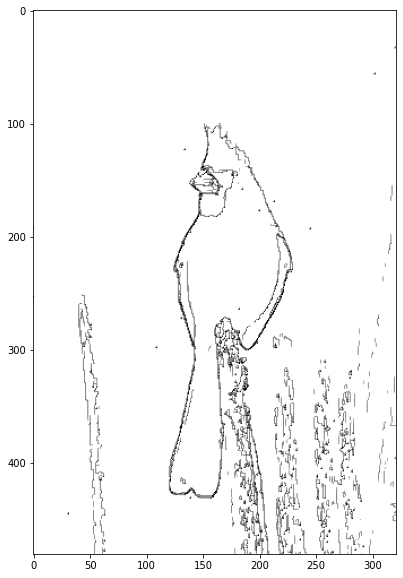

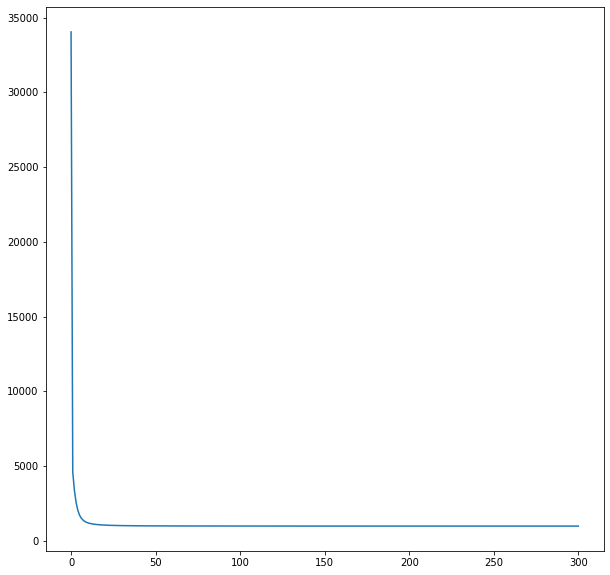

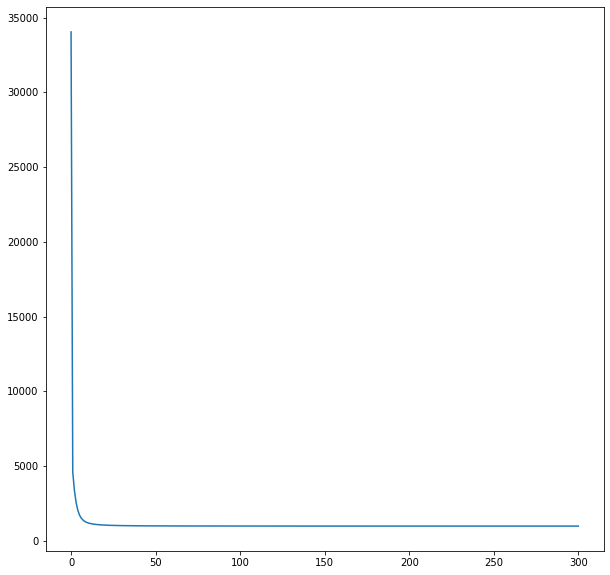

/home/hoangtrieuvy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.126214769850739
34.79967868558725


 17%|██████████▋                                                   | 52/300 [00:05<00:28,  8.60it/s]

In [ ]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            cont = np.where(cont > 0, 1, 0)


            rows,cols,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)
            palm_l1_solver = DMS(norm_type="l1",
                                    edges="similar",
                                    beta=5,
                                    lamb=0.01,
                                    stop_criterion=1e-8,
                                    MaximumIteration=300,
                                    method="SLPAM",
                                    noised_image_input=z,
                                    optD="OptD",
                                    dk_SLPAM_factor=1e-5,
                                    A=np.ones((rows,cols)))
            out_palm_l1 = palm_l1_solver.process()
            listx+= [out_palm_l1[1]]
            liste+= [out_palm_l1[0]]
            plt.figure(figsize=(10,10))
            plt.imshow(out_palm_l1[1])
            plt.axis('off')
            plt.show()
            
            epred = (out_palm_l1[0][:,:,0]+out_palm_l1[0][:,:,1])/2
            ethres = (epred>0.2)*np.ones_like(epred)
            plt.figure(figsize=(10,10))
            plt.imshow(epred,cmap='gray_r')
#             plt.axis('off')
            plt.show()
#             plt.figure(figsize=(10,10))
#             plt.imshow(ethres,cmap='gray_r')
# #             plt.axis('off')
#             plt.show()
            plt.figure(figsize=(10,10))
            plt.plot(out_palm_l1[2])
#             plt.axis('off')
            plt.show()
            plt.figure(figsize=(10,10))
            plt.plot(out_palm_l1[5])
#             plt.axis('off')
            plt.show()
            print(jaccard_score(cont,ethres,average='macro'))
            print(calculate_psnr(x,out_palm_l1[1]))
#         idim+=1 
#         if idim ==1:
#             break

Objective: PSNR


100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.86it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100.0 0.01 33.78257632813943


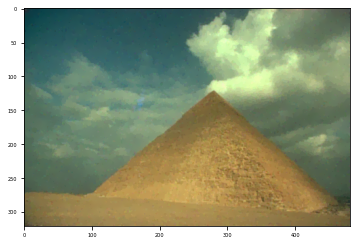

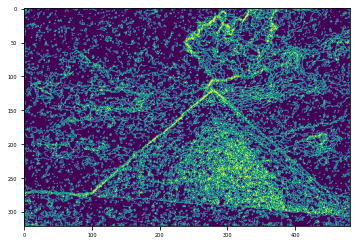

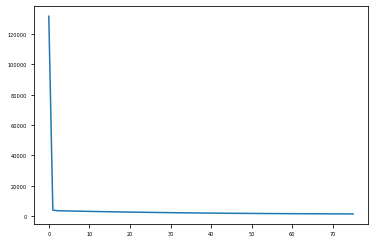

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.74it/s]


100.0 0.05623413251903491 32.32867585170225


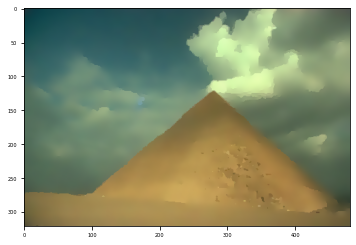

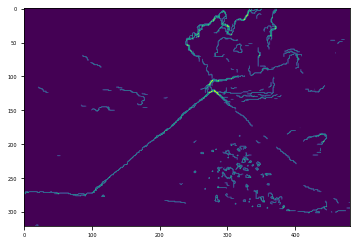

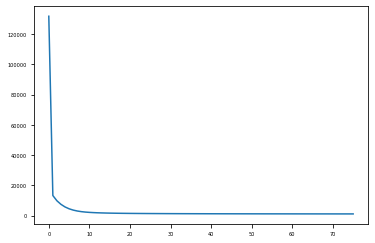

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.77it/s]


100.0 0.31622776601683794 31.147186909182544


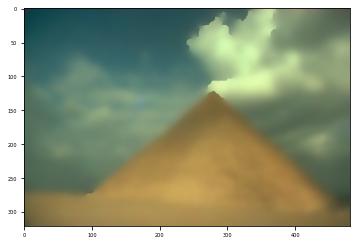

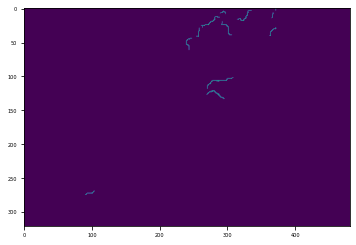

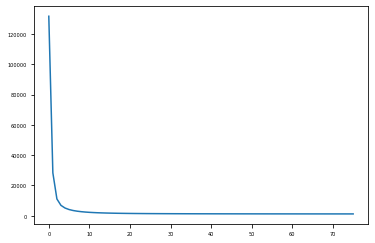

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.80it/s]


100.0 1.7782794100389228 30.612359038777743


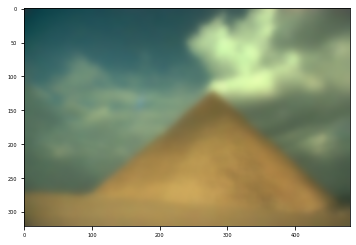

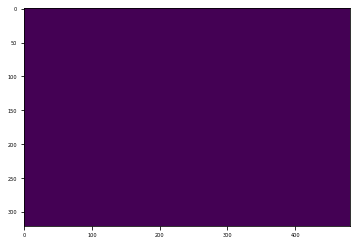

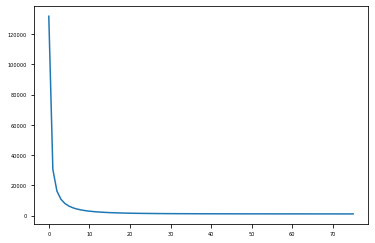

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.79it/s]


100.0 10.0 30.610764241517042


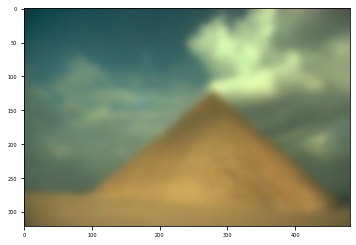

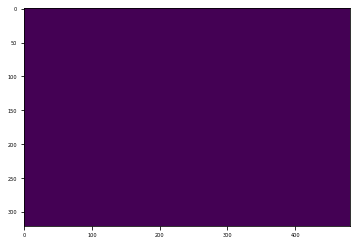

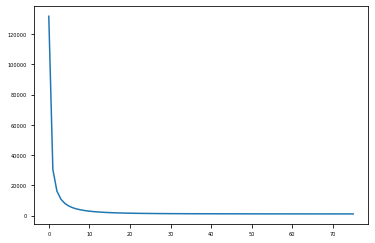

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.77it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17.78279410038923 0.01 33.64756052105733


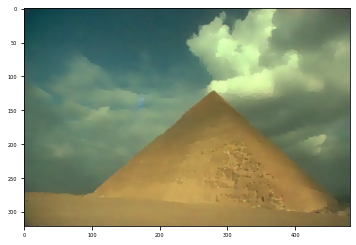

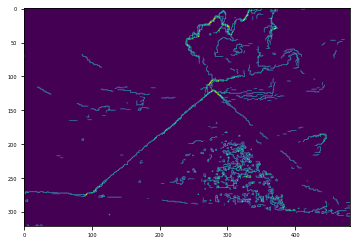

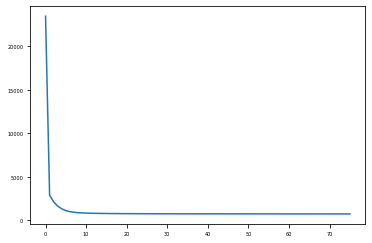

100%|███████████████████████████████████████████████████████████████| 75/75 [00:08<00:00,  8.77it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17.78279410038923 0.05623413251903491 32.444487490200224


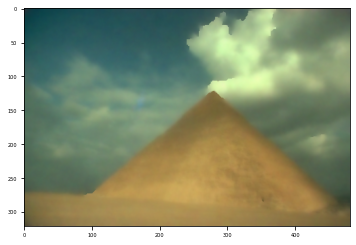

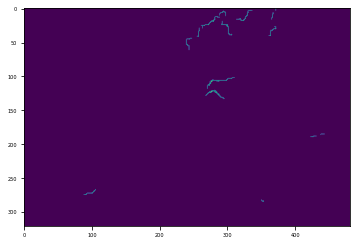

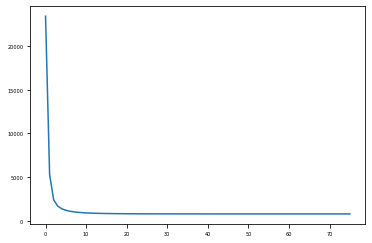

 45%|████████████████████████████▌                                  | 34/75 [00:04<00:04,  8.49it/s]


KeyboardInterrupt: 

In [66]:
# listname = ['80090','310007']
listname = ['42044','299091','227046']
# listname = ['108073']
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/train/"
listx=[]
liste=[]
idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/train/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            cont = np.where(cont > 0, 1, 0)


            rows,cols,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)
            tab_PSNR_out,tab_coord_max_PSNR_out,tab_PSNR_max,out1,out0= golden_section_map(z,x,cont,bmax=2,bmin=-1,lmax=1,lmin=-2,scale_type='10',
                       grid_size=5,max_round=4,objective='PSNR',maxiter=75,stop_crit=1e-4,
                                    method='SLPAM',norm_type='l1',eps=2.,eps_AT_min=0.02,A=np.ones((rows,cols)))
#             scipy.io.savemat("../../../../Documents/dataset/BSDS500/data/param_dist_Jaccard_PALM_l1/train/"+image_name+".mat",dict(tab_Jaccard_out=tab_Jaccard_out,tab_coord_max_Jaccard_out=tab_coord_max_Jaccard_out,tab_Jaccard_max=tab_Jaccard_max,out1=out1,out0=out0))
#             cont_thres = out0#np.ones_like(out0)*(out0>0.5)
#     #         
#             cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
        
            listx+= [out1]
            liste+= [out0]
            plt.figure(figsize=(10,10))
            plt.imshow(out1)
            plt.axis('off')
            plt.show()
            
            epred = (out0[:,:,0]+out0[:,:,1])/2
            ethres = (epred>0.2)*np.ones_like(epred)
            plt.figure(figsize=(10,10))
            plt.imshow(epred,cmap='gray_r')
            plt.axis('off')
            plt.show()
            plt.figure(figsize=(10,10))
            plt.imshow(ethres,cmap='gray_r')
            plt.axis('off')
            plt.show()
            print(jaccard_score(cont,ethres,average='macro'))
            print(calculate_psnr(x,out1))
            plt.figure()
            plt.imshow(np.rot90(out1))
            plt.axis('off')
            plt.savefig('ggs_denoised_'+image_name+'.jpg.png',bbox_inches='tight',pad_inches = 0)
            plt.show()
            plt.figure()
            plt.imshow(np.rot90(epred),cmap='gray')
            plt.axis('off')
            plt.savefig('ggs_cont_pred_'+image_name+'.jpg.png',bbox_inches='tight',pad_inches = 0)
            plt.show()
#         idim+=1 
#         if idim ==1:
#             break



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


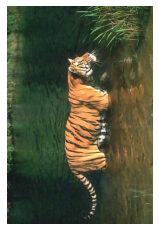

In [61]:
plt.figure()
plt.imshow(np.rot90(out1))
plt.axis('off')
plt.savefig('ggs_denoised_108073.jpg.png',bbox_inches='tight',pad_inches = 0)
plt.show()
plt.figure()
plt.imshow(np.rot90(epred),cmap='gray')
plt.axis('off')
plt.savefig('ggs_cont_pred_108073.jpg.png',bbox_inches='tight',pad_inches = 0)
plt.show()

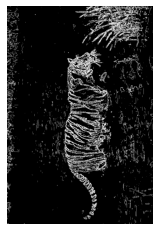

In [62]:
plt.figure()
plt.imshow(np.rot90(epred),cmap='gray')
plt.axis('off')
plt.savefig('ggs_cont_pred_108073.jpg.png',bbox_inches='tight',pad_inches = 0)
plt.show()

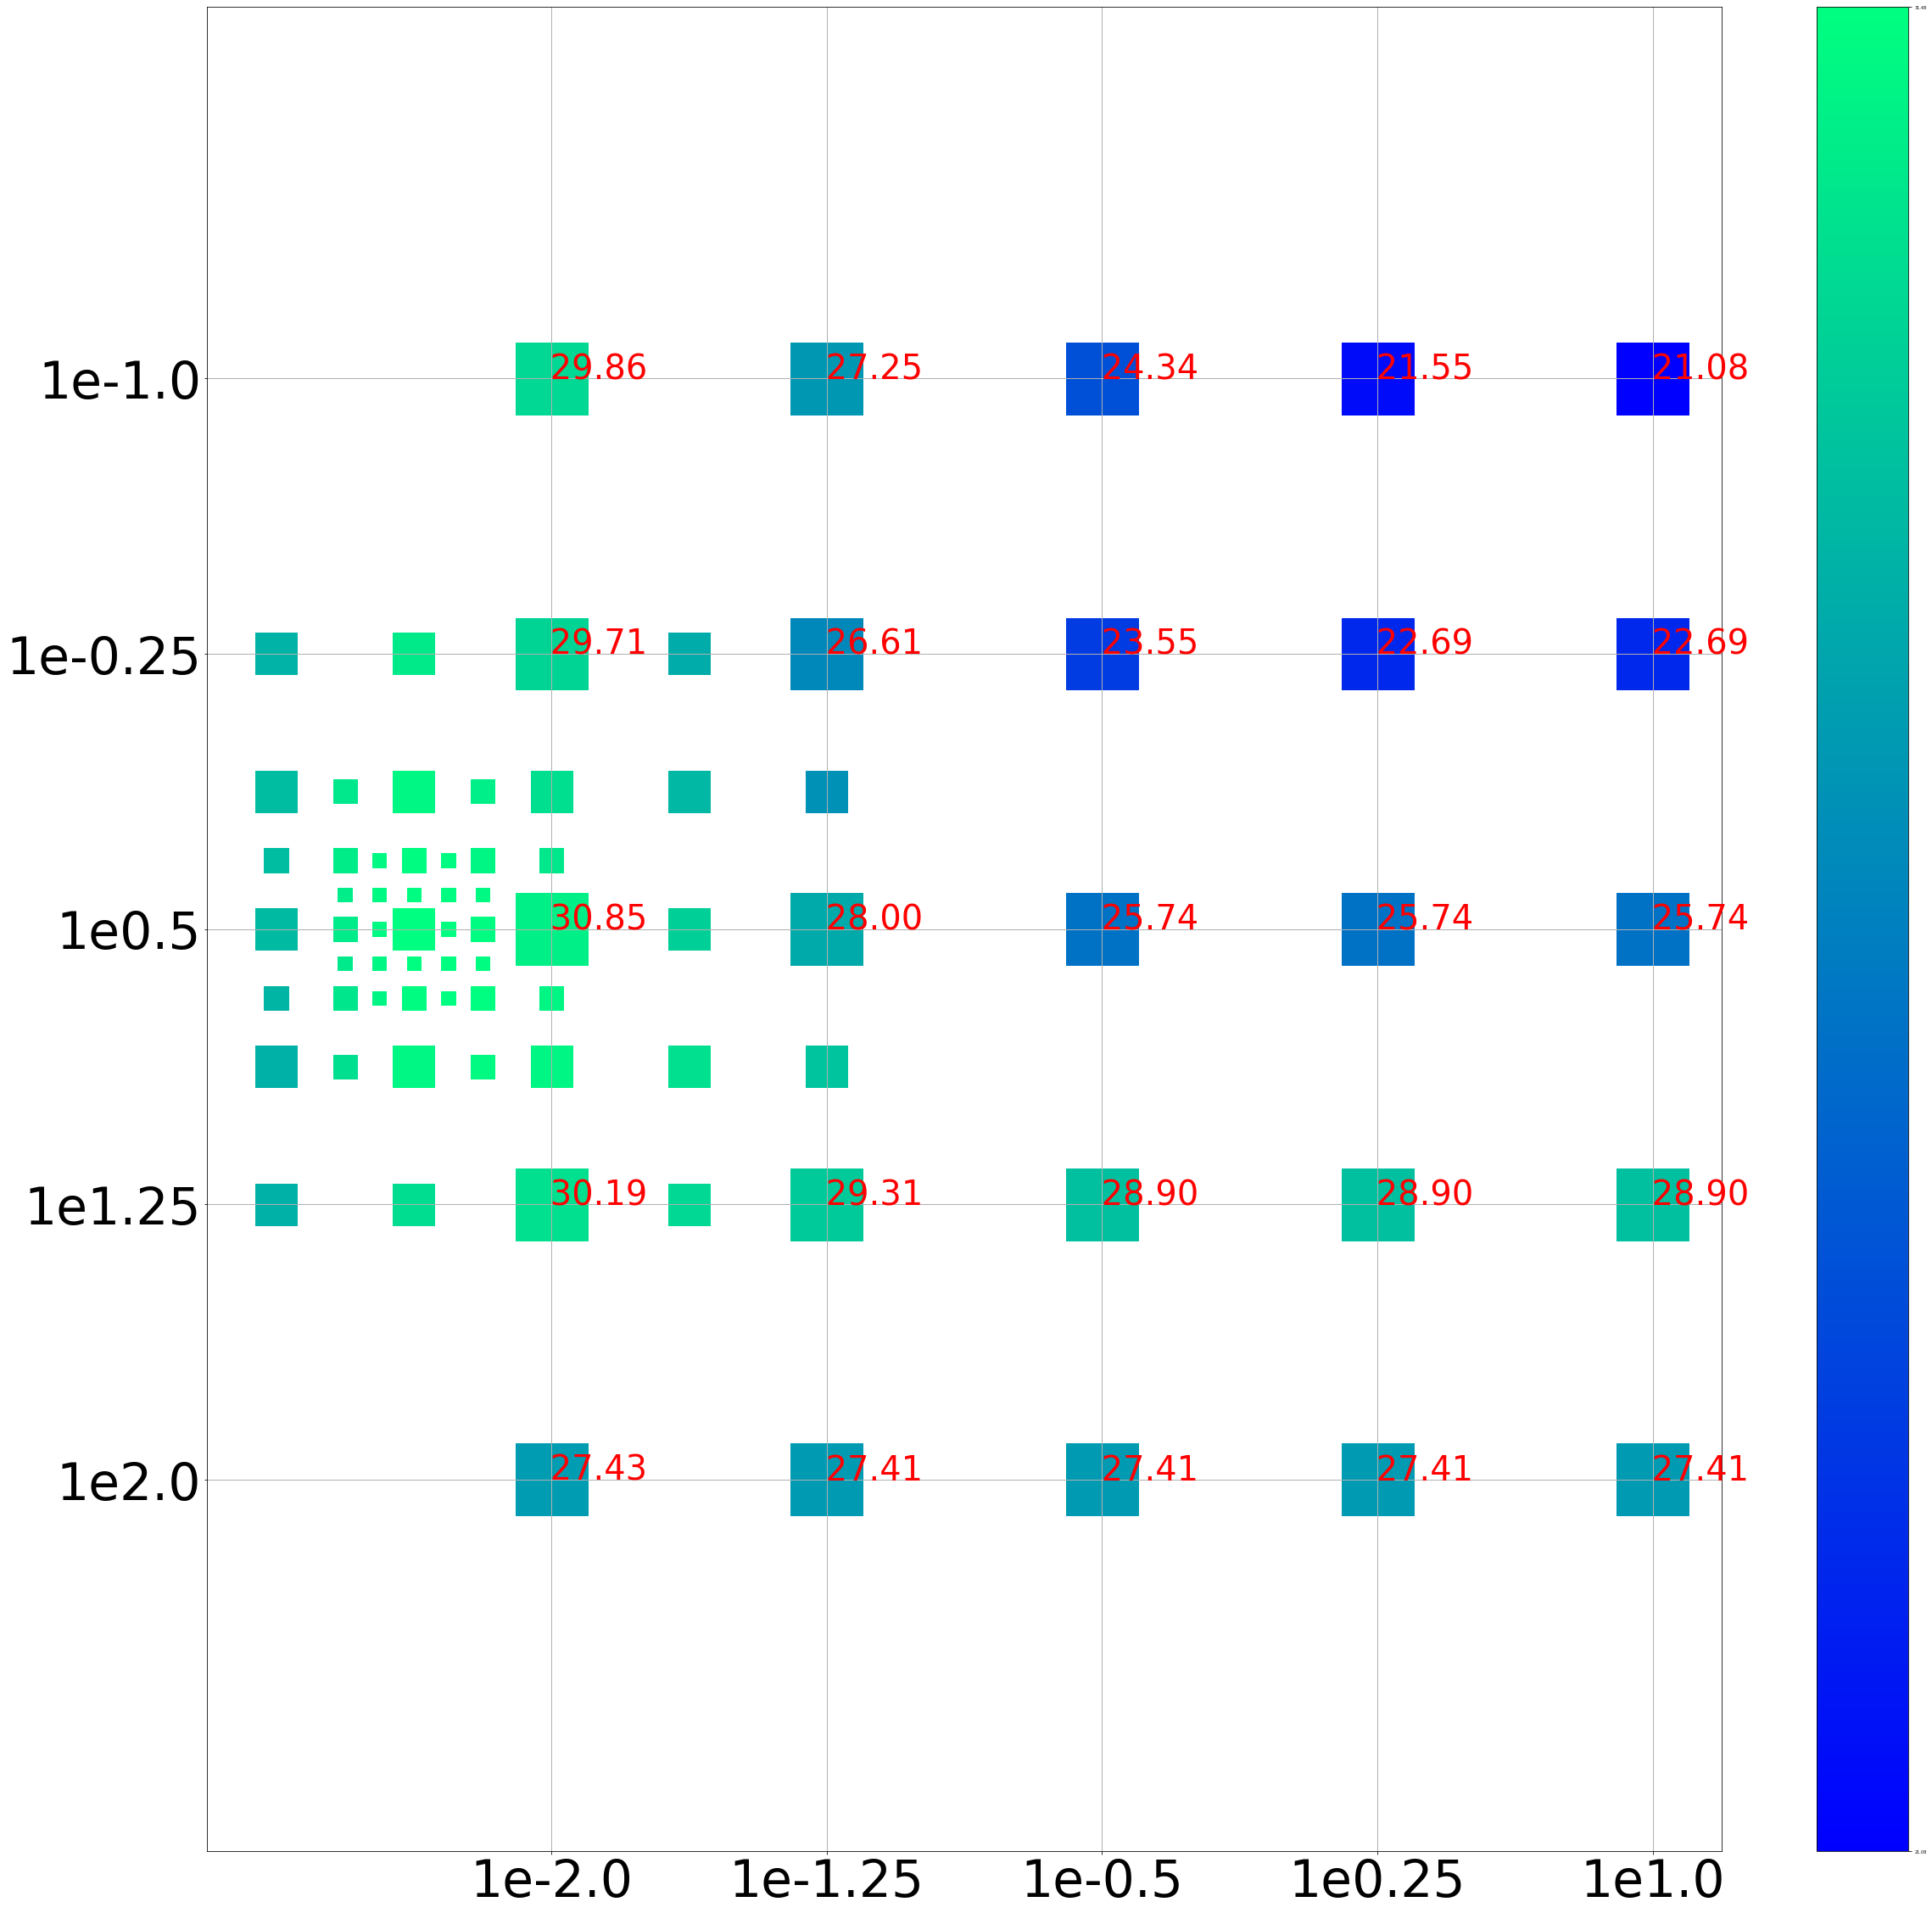

In [50]:
from tools_dms import *

bmax=2
bmin=-1
lmax=1
lmin=-2
grid_size=5
beta_axis   = np.linspace(bmax,bmin,grid_size) # Beta y-axis decreasing, because of python imshow
lambda_axis = np.linspace(lmin,lmax,grid_size) # Keep lambda x-axis lambda increasing,
draw_dots_multiresolution(tab_coord_max_PSNR_out,tab_PSNR_out,beta_axis,lambda_axis,name='PSNR')

In [9]:
tab_coord_max_PSNR_out

[(2, 0), (1, 1), (2, 2), (0, 1)]

In [10]:
tab_PSNR_out

array([[[31.03704729, 26.77590859, 23.98452323, 23.62927966],
        [30.26636767, 26.98962945, 26.5203396 , 26.5203396 ],
        [31.18662808, 30.19958654, 30.16626191, 30.16626191],
        [27.46294388, 27.46180843, 27.46180843, 27.46180843]],

       [[27.02672837, 31.45476479, 28.80480434, 26.98962945],
        [26.76477682, 31.87820544, 30.33498133, 29.42594891],
        [27.03193731, 29.9780192 , 29.89935988, 29.77686972],
        [27.08540448, 27.45330948, 27.46268797, 27.46180843]],

       [[27.02672837, 30.7491795 , 30.75316259, 28.80480434],
        [26.8554305 , 31.15348836, 31.4297694 , 29.78933564],
        [26.75412444, 30.47345034, 31.53145313, 30.66613217],
        [27.03193731, 29.47295098, 30.06000222, 29.89935988]],

       [[31.15348836, 31.83418698, 30.88528699, 29.78933564],
        [30.74372603, 31.82592891, 31.30640496, 30.48105324],
        [30.18465656, 31.20334197, 31.04971849, 30.62721121],
        [29.47295098, 30.03112244, 30.02571013, 29.89935988]]])

In [ ]:
listname = ['80090']

Objective: Jaccard


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.54it/s]


Round:  0   0.16260046945017426 beta:   17.78279410038923 , lam:   0.05623413251903491
0.75


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.30it/s]


Round:  1   0.18070059484467946 beta:   100.0 , lam:   0.1333521432163324
0.375


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.28it/s]


Round:  2   0.18083686379200278 beta:   153.9926526059492 , lam:   0.31622776601683794
0.1875


100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.29it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Round:  3   0.18090919660504592 beta:   237.13737056616552 , lam:   0.4869675251658631
0.09375




Meaningful r (optimum is in the middle) 4
Total Computation time: 140.8624861240387


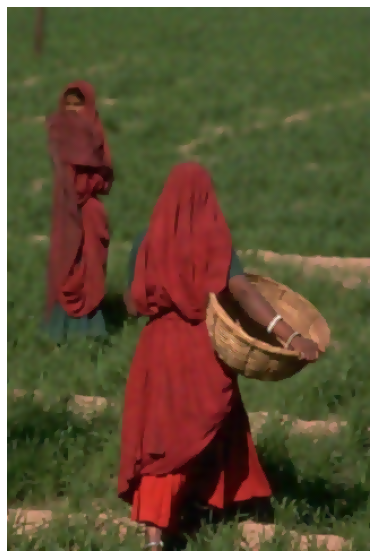

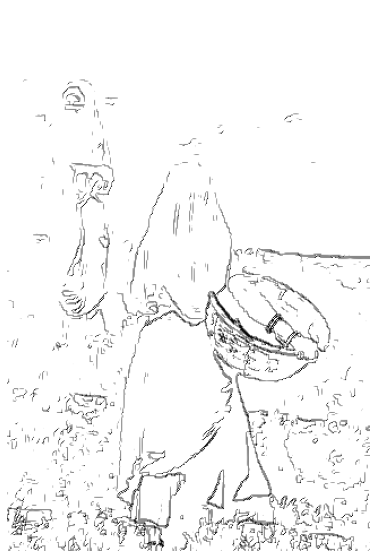

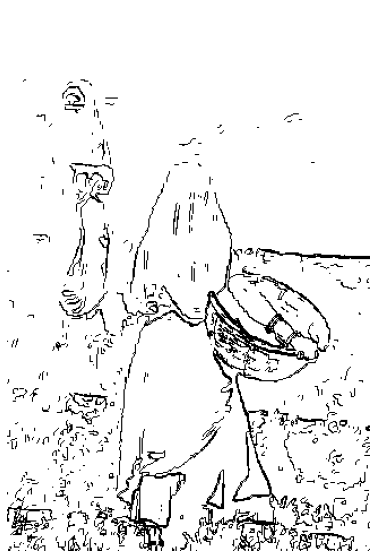

0.17083000224368147
28.390530339780273


In [41]:

valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"
listx=[]
liste=[]
idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            cont = np.where(cont > 0, 1, 0)


            rows,cols,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)
            tab_Jaccard_out,tab_coord_max_Jaccard_out,tab_Jaccard_max,out1,out0= golden_section_map(z,x,cont,bmax=2,bmin=-1,lmax=1,lmin=-2,scale_type='10',
                       grid_size=5,max_round=4,objective='Jaccard',maxiter=10,stop_crit=1e-4,
                                    method='SLPAM',norm_type='l1',eps=2.,eps_AT_min=0.02,A=np.ones((rows,cols)))
#             scipy.io.savemat("../../../../Documents/dataset/BSDS500/data/param_dist_Jaccard_PALM_l1/train/"+image_name+".mat",dict(tab_Jaccard_out=tab_Jaccard_out,tab_coord_max_Jaccard_out=tab_coord_max_Jaccard_out,tab_Jaccard_max=tab_Jaccard_max,out1=out1,out0=out0))
#             cont_thres = out0#np.ones_like(out0)*(out0>0.5)
#     #         
#             cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
        
            listx+= [out1]
            liste+= [out0]
            plt.figure(figsize=(10,10))
            plt.imshow(out1)
            plt.axis('off')
            plt.show()
            
            epred = (out0[:,:,0]+out0[:,:,1])/2
            ethres = (epred>0.2)*np.ones_like(epred)
            plt.figure(figsize=(10,10))
            plt.imshow(epred,cmap='gray_r')
            plt.axis('off')
            plt.show()
            plt.figure(figsize=(10,10))
            plt.imshow(ethres,cmap='gray_r')
            plt.axis('off')
            plt.show()
            print(jaccard_score(cont,ethres,average='macro'))
            print(calculate_psnr(x,out1))
#         idim+=1 
#         if idim ==1:
#             break



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


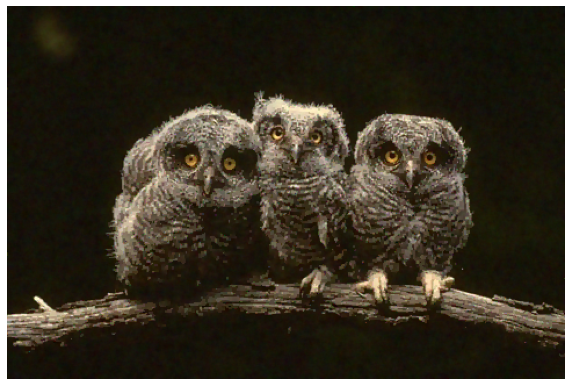

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(out1,cmap='gray_r')
plt.axis('off')
plt.savefig('42044.png',bbox_inches='tight',pad_inches = 0)
plt.show()

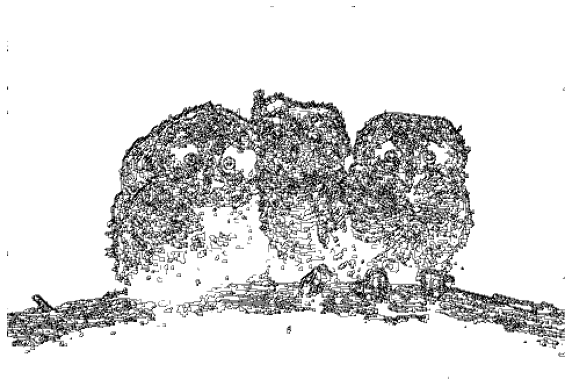

In [70]:
plt.figure(figsize=(10,10))
plt.imshow(epred,cmap='gray_r')
plt.axis('off')
plt.savefig('edges_42044.png',bbox_inches='tight',pad_inches = 0)
plt.show()

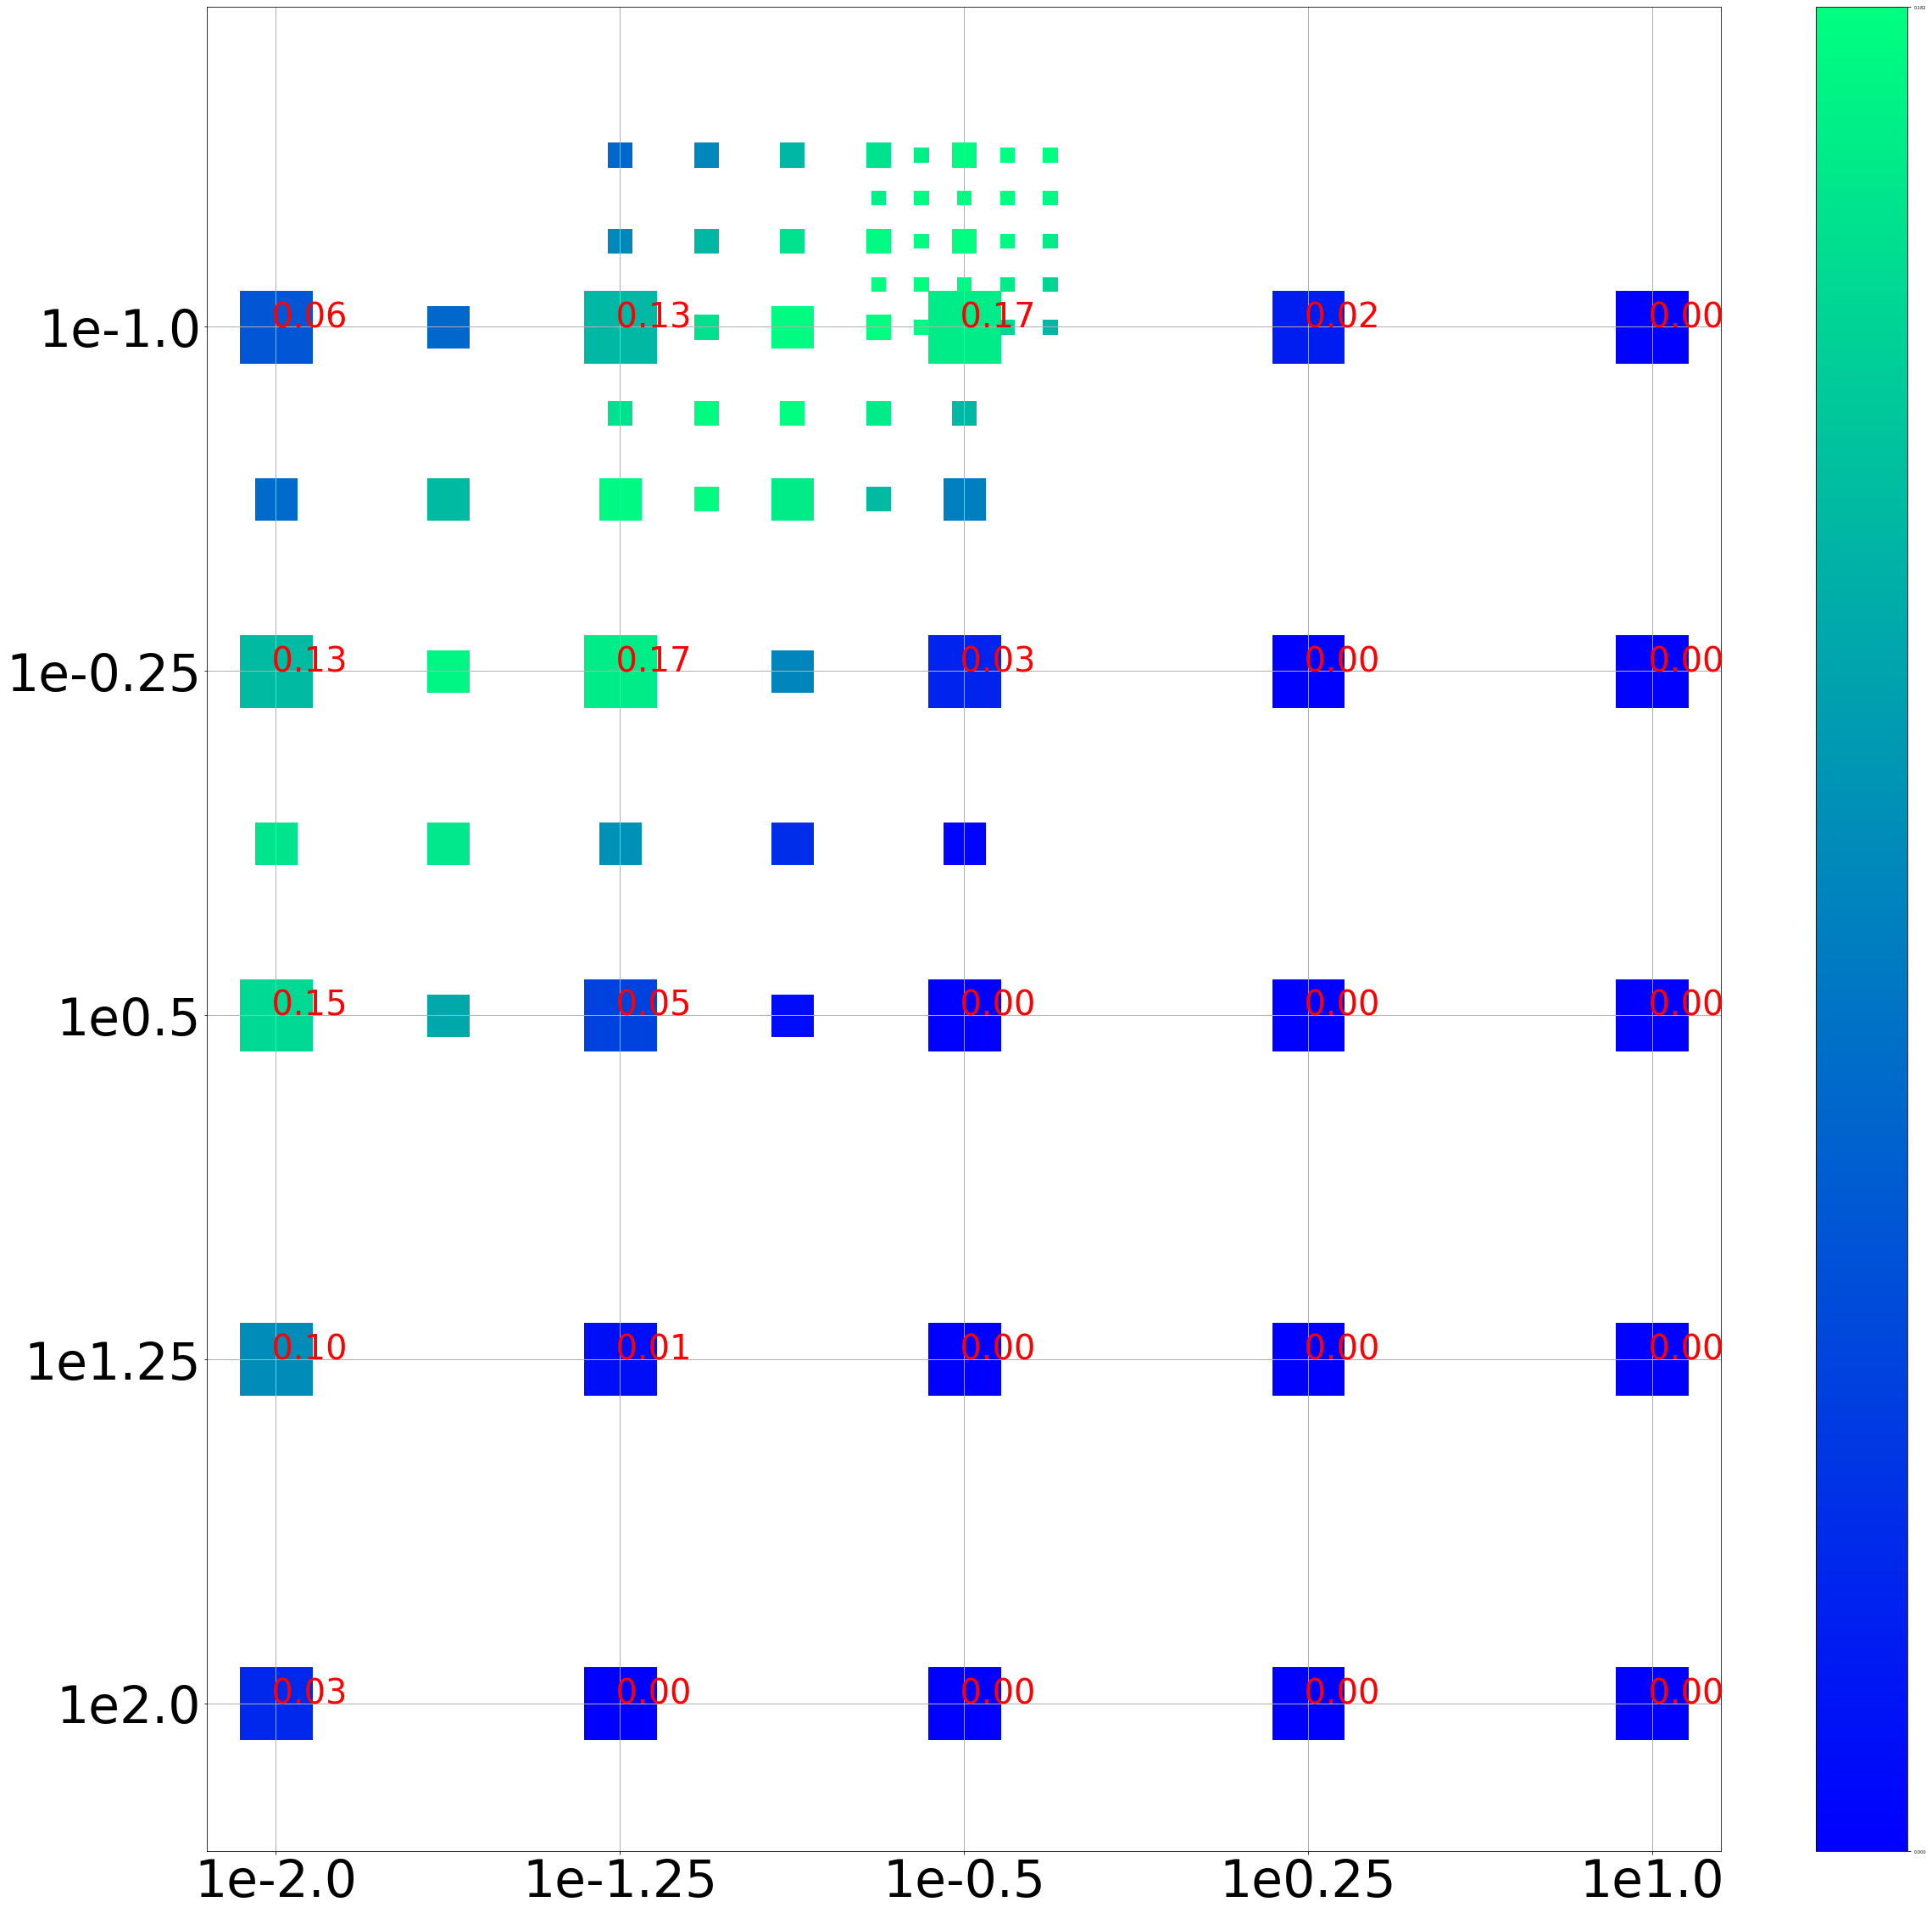

In [42]:
from tools_dms import *

bmax=2
bmin=-1
lmax=1
lmin=-2
grid_size=5
beta_axis   = np.linspace(bmax,bmin,grid_size) # Beta y-axis decreasing, because of python imshow
lambda_axis = np.linspace(lmin,lmax,grid_size) # Keep lambda x-axis lambda increasing,
draw_dots_multiresolution(tab_coord_max_PSNR_out,tab_PSNR_out,beta_axis,lambda_axis,name='Jaccard')

In [43]:
tab_coord_max_PSNR_out

[(1, 1), (0, 3), (1, 4), (0, 4)]

In [44]:
tab_PSNR_out

array([[[6.14209382e-02, 1.30968786e-01, 1.68302153e-01, 2.12130903e-02,
         0.00000000e+00],
        [1.32300430e-01, 1.68350849e-01, 2.60749255e-02, 0.00000000e+00,
         0.00000000e+00],
        [1.54711674e-01, 4.70419063e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00253093e-01, 1.01075269e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [2.80137540e-02, 1.08061379e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]],

       [[6.14209382e-02, 7.46146335e-02, 1.30968786e-01, 1.78483506e-01,
         1.68302153e-01],
        [7.64888310e-02, 1.32996531e-01, 1.77080801e-01, 1.68447517e-01,
         9.08038213e-02],
        [1.32300430e-01, 1.74993186e-01, 1.68350849e-01, 9.53962981e-02,
         2.60749255e-02],
        [1.63187399e-01, 1.65371673e-01, 1.03976651e-01, 3.21183307e-02,
         3.02017042e-03],
        [1.54711674e-01, 1.19694879e-01, 4.70419063e-02, 9.03322938e-03,
         0.00000000e+00]],

      